# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Update pandas
#!pip install --upgrade pandas
#!pip install --upgrade seaborn


In [3]:
#import the dataset
df = pd.read_csv("Heart.csv")
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


# Statistical and categorical Summary of the dataset

In [4]:
#statistical summary of the dataset
df_summary = df.describe()
print(df_summary)

       Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.994971   22.875003 

In [5]:
#categorical summary of the dataset
categorical_columns = ['ChestPain', 'Thal', 'AHD']
df_categorical_summary = df[categorical_columns].describe()
print(df_categorical_summary)

           ChestPain    Thal  AHD
count            303     301  303
unique             4       3    2
top     asymptomatic  normal   No
freq             144     166  164


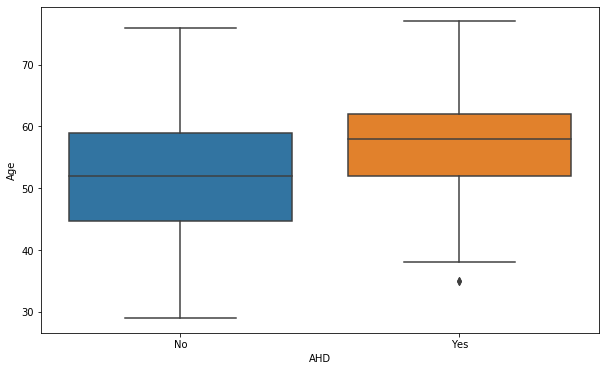

In [6]:
#Boxplot for Age vs AHD
plt.figure(figsize=(10, 6))
sns.boxplot(x='AHD', y='Age', data=df)
plt.show()

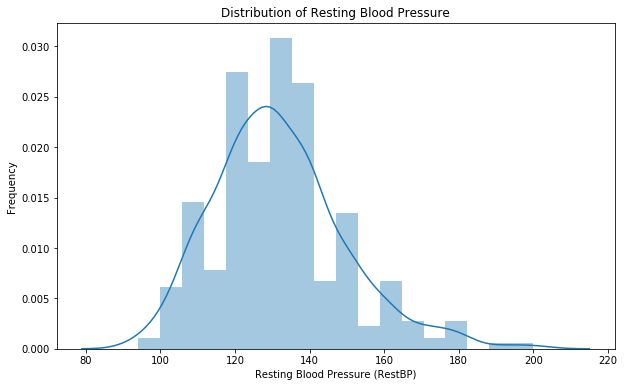

In [7]:
#Distribution of Resting Blood Pressure (RestBP)
plt.figure(figsize=(10, 6))

# Check if histplot is available (Seaborn version 0.11.0 or later)
if hasattr(sns, 'histplot'):
    sns.histplot(df['RestBP'], kde=True)
else:
    sns.distplot(df['RestBP'], kde=True)

plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (RestBP)')
plt.ylabel('Frequency')
plt.show()


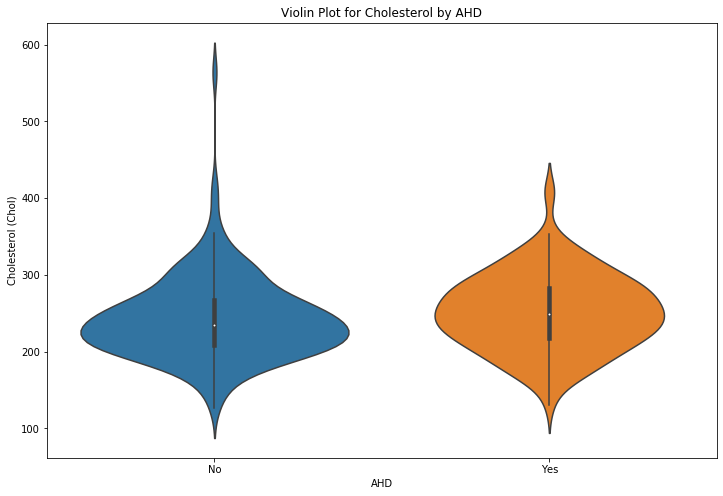

In [8]:
#Violin plot for Cholesterol (Chol) by AHD
plt.figure(figsize=(12, 8))
sns.violinplot(x='AHD', y='Chol', data=df)
plt.title('Violin Plot for Cholesterol by AHD')
plt.xlabel('AHD')
plt.ylabel('Cholesterol (Chol)')
plt.show()


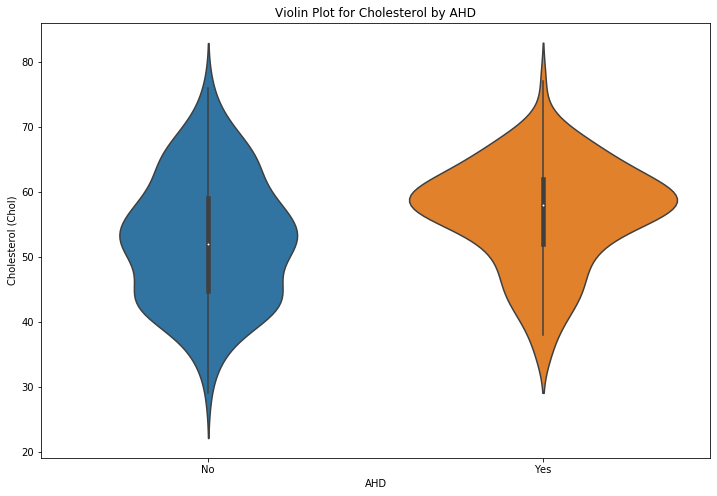

In [9]:
#Violin plot for Cholesterol (Chol) by AHD
plt.figure(figsize=(12, 8))
sns.violinplot(x='AHD', y='Age', data=df)
plt.title('Violin Plot for Cholesterol by AHD')
plt.xlabel('AHD')
plt.ylabel('Cholesterol (Chol)')
plt.show()

# Some data filteration and distrubation of data

In [10]:
#dropping unwanted columns
df = df.drop(columns = 'Unnamed: 0')
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [11]:
#converting categorical data in numeric values
df['ChestPain'] = df['ChestPain'].astype('category')
df['ChestPain'] = df['ChestPain'].cat.codes
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [12]:
df['Thal'] = df['Thal'].astype('category')
df['Thal'] = df['Thal'].cat.codes

df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [13]:
#checking if any columns containing null value 
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64

Dropping null values rows

In [14]:
df = df.dropna()
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2,1
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1


In [15]:
X = df.drop(columns = 'AHD')
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2


In [16]:
y = df['AHD']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 21)

In [19]:
X_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
290,67,1,1,152,212,0,2,150,0,0.8,2,0.0,2
264,61,1,0,138,166,0,2,125,1,3.6,2,1.0,1
197,45,0,0,138,236,0,2,152,1,0.2,2,0.0,1
77,51,0,1,140,308,0,2,142,0,1.5,1,1.0,1
15,57,1,1,150,168,0,0,174,0,1.6,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,69,1,1,140,254,0,2,146,0,2.0,2,3.0,2
120,48,1,0,130,256,1,2,150,1,0.0,1,2.0,2
48,65,0,1,140,417,1,2,157,0,0.8,1,1.0,1
262,60,0,3,150,240,0,0,171,0,0.9,1,0.0,1


In [20]:
X_test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
61,46,0,1,142,177,0,2,160,1,1.4,3,0.0,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2
55,54,1,0,124,266,0,2,109,1,2.2,2,1.0,2
245,67,1,0,120,237,0,0,71,0,1.0,2,0.0,1
95,52,1,0,128,255,0,0,161,1,0.0,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,41,1,2,135,203,0,0,132,0,0.0,2,0.0,0
117,35,0,0,138,183,0,0,182,0,1.4,1,0.0,1
211,38,1,3,120,231,0,0,182,1,3.8,2,0.0,2
233,74,0,2,120,269,0,2,121,1,0.2,1,1.0,1


In [21]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled

array([[ 1.38573367,  0.67185481,  0.21213203, ...,  0.70792084,
        -0.70203785,  1.13274336],
       [ 0.71454401,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339, -0.49996949],
       [-1.07529507, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949],
       ...,
       [ 1.16200378, -1.48841682,  0.21213203, ..., -1.01249144,
         0.36119339, -0.49996949],
       [ 0.60267907, -1.48841682,  2.32335085, ..., -1.01249144,
        -0.70203785, -0.49996949],
       [ 0.82640895, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949]])

In [23]:
X_test_scaled

array([[-0.96343013, -1.48841682,  0.21213203, ...,  2.42833312,
        -0.70203785, -0.49996949],
       [ 0.26708424,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339,  1.13274336],
       [-0.06851059,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339,  1.13274336],
       ...,
       [-1.85834967,  0.67185481,  2.32335085, ...,  0.70792084,
        -0.70203785,  1.13274336],
       [ 2.16878827, -1.48841682,  1.26774144, ..., -1.01249144,
         0.36119339, -0.49996949],
       [ 1.05013884, -1.48841682, -0.84347737, ...,  0.70792084,
         1.42442462, -0.49996949]])

# Logistic Regression with libraries

In [24]:
# Create and train the logistic regression model
sklearn_logreg = LogisticRegression(random_state=0)
sklearn_logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Make predictions on the test set
sklearn_predictions = sklearn_logreg.predict(X_test_scaled)
sklearn_predictions

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1], dtype=int8)

In [26]:
# Calculate accuracy
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print(f"Sklearn Logistic Regression Accuracy: {sklearn_accuracy}")

Sklearn Logistic Regression Accuracy: 0.8666666666666667


# Logistic Regression without libraries

In [27]:
import numpy as np

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate  # Learning rate for controlling the step size during gradient descent
        self.num_iterations = num_iterations  # Number of iterations or epochs for training
        self.fit_intercept = fit_intercept  # Whether to include an intercept term in the model
        self.verbose = verbose  # If True, print training loss at certain intervals

    def __b_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))  # Creating an array of ones for the intercept term
        return np.concatenate((intercept, X), axis=1)  # Concatenating intercept with input features

    def __sigmoid_function(self, z):
        # Sigmoid function used to map any real-valued number to a value between 0 and 1
        predictions = 1 / (1 + np.exp(-z))
        return np.clip(predictions, 1e-15, 1 - 1e-15)  # Clip predictions to avoid extreme values

    def __loss(self, yp, y):
        # Logarithmic loss function used for binary classification problems
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()  # Compute the mean loss

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__b_intercept(X)  # Add intercept term if fit_intercept is True
        self.W = np.zeros(X.shape[1])  # Initialize weights with zeros

        for i in range(self.num_iterations):
            z = np.dot(X, self.W)  # Calculate the linear combination of input and weights
            yp = self.__sigmoid_function(z)  # Apply the sigmoid function to compute predictions
            gradient = np.dot(X.T, (yp - y)) / y.size  # Compute the gradient of the loss function

            # Clip gradients to prevent exploding gradients
            gradient = np.clip(gradient, -1, 1)

            self.W -= self.learning_rate * gradient  # Update weights using gradient descent

            z = np.dot(X, self.W)  # Recalculate z with updated weights
            yp = self.__sigmoid_function(z)  # Recalculate predictions with updated weights
            loss = self.__loss(yp, y)  # Calculate the loss with updated predictions

            if self.verbose and i % 10000 == 0:
                print(f'loss: {loss} \t')  # Print training loss at certain intervals if verbose is True

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__b_intercept(X)  # Add intercept term if fit_intercept is True
        return self.__sigmoid_function(np.dot(X, self.W))  # Predict probabilities of class 1

    def predict(self, X):
        return self.predict_prob(X).round()  # Predict class labels by rounding predicted probabilities


In [28]:
# Create and train the custom logistic regression model with a different learning rate
custom_logreg = CustomLogisticRegression(learning_rate=0.001, num_iterations=50000, verbose=True)
custom_logreg.fit(X_train.values, y_train.values)


loss: 0.7068771828535613 	
loss: 0.4378676397072391 	
loss: 0.4211632092115727 	
loss: 0.4132593136701502 	
loss: 0.4077140471663156 	


In [29]:
# Make predictions on the test set
custom_predictions = custom_logreg.predict(X_test.values)

In [30]:
# Calculate accuracy
custom_accuracy = accuracy_score(y_test, custom_predictions)
print(f"Custom Logistic Regression Accuracy: {custom_accuracy}")

Custom Logistic Regression Accuracy: 0.8333333333333334


In [31]:
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)

In [32]:
log_reg.predict(X_train_scaled)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int8)

In [33]:
log_reg.score(X_train_scaled, y_train)

0.8708133971291866

In [34]:
log_reg.score(X_test_scaled, y_test)

0.8666666666666667

## Comparing both model's reults with ROC Curve and Confusion matrix 

In [35]:
# Sklearn Logistic Regression
sklearn_probs = sklearn_logreg.predict_proba(X_test_scaled)[:, 1]
sklearn_fpr, sklearn_tpr, _ = roc_curve(y_test, sklearn_probs)
sklearn_auc = roc_auc_score(y_test, sklearn_probs)

In [36]:
# Custom Logistic Regression
custom_probs = custom_logreg.predict_prob(X_test.values)
custom_fpr, custom_tpr, _ = roc_curve(y_test, custom_probs)
custom_auc = roc_auc_score(y_test, custom_probs)

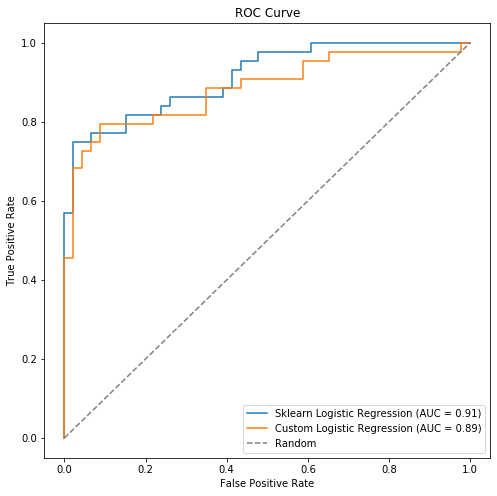

In [37]:
# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(sklearn_fpr, sklearn_tpr, label=f'Sklearn Logistic Regression (AUC = {sklearn_auc:.2f})')
plt.plot(custom_fpr, custom_tpr, label=f'Custom Logistic Regression (AUC = {custom_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [38]:
#confuion matrix
from sklearn.metrics import confusion_matrix

# Sklearn Logistic Regression
sklearn_conf_matrix = confusion_matrix(y_test, sklearn_predictions)
print("Sklearn Logistic Regression Confusion Matrix:")
print(sklearn_conf_matrix)

# Custom Logistic Regression
custom_conf_matrix = confusion_matrix(y_test, custom_predictions)
print("\nCustom Logistic Regression Confusion Matrix:")
print(custom_conf_matrix)


Sklearn Logistic Regression Confusion Matrix:
[[45  1]
 [11 33]]

Custom Logistic Regression Confusion Matrix:
[[42  4]
 [11 33]]


# navie bayes algorithm 



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [40]:
X1 = df.drop(columns = 'AHD')
y1 = df['AHD']

In [41]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=21)

In [42]:
# Standardize the features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [43]:
X1_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
290,67,1,1,152,212,0,2,150,0,0.8,2,0.0,2
264,61,1,0,138,166,0,2,125,1,3.6,2,1.0,1
197,45,0,0,138,236,0,2,152,1,0.2,2,0.0,1
77,51,0,1,140,308,0,2,142,0,1.5,1,1.0,1
15,57,1,1,150,168,0,0,174,0,1.6,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,69,1,1,140,254,0,2,146,0,2.0,2,3.0,2
120,48,1,0,130,256,1,2,150,1,0.0,1,2.0,2
48,65,0,1,140,417,1,2,157,0,0.8,1,1.0,1
262,60,0,3,150,240,0,0,171,0,0.9,1,0.0,1


In [44]:
# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
naive_bayes_model = GaussianNB()

In [45]:
# Train the model on the training data
#naive_bayes_model.fit(X_train, y_train)
naive_bayes_model.fit(X1_train_scaled, y1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
# Predictions on the testing data
#naive_bayes_predictions = naive_bayes_model.predict(X_test)
naive_bayes_predictions = naive_bayes_model.predict(X1_test_scaled)

In [47]:
# Calculate accuracy
naive_bayes_accuracy = accuracy_score(y1_test, naive_bayes_predictions)
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy}")

Naive Bayes Accuracy: 0.8666666666666667


In [48]:
# Confusion matrix
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_predictions)
print("\nNaive Bayes Confusion Matrix:")
print(naive_bayes_conf_matrix)


Naive Bayes Confusion Matrix:
[[45  1]
 [11 33]]


In [49]:
# Classification report
naive_bayes_classification_report = classification_report(y_test, naive_bayes_predictions)
print("\nNaive Bayes Classification Report:")
print(naive_bayes_classification_report)


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        46
           1       0.97      0.75      0.85        44

    accuracy                           0.87        90
   macro avg       0.89      0.86      0.86        90
weighted avg       0.89      0.87      0.86        90



# k nearest neighbour


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [52]:
# Initialize and train the scikit-learn K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (n_neighbors) as needed
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [53]:
# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)
knn_predictions

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1], dtype=int8)

In [54]:
# Evaluate the scikit-learn K-Nearest Neighbors model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"Scikit-learn K-Nearest Neighbors Accuracy: {knn_accuracy}")

Scikit-learn K-Nearest Neighbors Accuracy: 0.5888888888888889


In [55]:
# Confusion matrix for scikit-learn K-Nearest Neighbors
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
print("Scikit-learn K-Nearest Neighbors Confusion Matrix:")
print(knn_conf_matrix)

Scikit-learn K-Nearest Neighbors Confusion Matrix:
[[31 15]
 [22 22]]


In [56]:
# Classification report for scikit-learn K-Nearest Neighbors
knn_classification_report = classification_report(y_test, knn_predictions)
print("Scikit-learn K-Nearest Neighbors Classification Report:")
print(knn_classification_report)

Scikit-learn K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.67      0.63        46
           1       0.59      0.50      0.54        44

    accuracy                           0.59        90
   macro avg       0.59      0.59      0.58        90
weighted avg       0.59      0.59      0.59        90



# Decision Tree algorithm

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [59]:
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [60]:
# Make predictions
dt_predictions = dt_model.predict(X_test)

In [61]:
# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.7111111111111111


# Comparison of the Algorithms

In [62]:
print(f"Sklearn Logistic Regression Accuracy: {sklearn_accuracy}")
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy}")
print(f"Scikit-learn K-Nearest Neighbors Accuracy: {knn_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")

Sklearn Logistic Regression Accuracy: 0.8666666666666667
Naive Bayes Accuracy: 0.8666666666666667
Scikit-learn K-Nearest Neighbors Accuracy: 0.5888888888888889
Decision Tree Accuracy: 0.7111111111111111


In [63]:
# Accuracy values for each custom model
accuracies = [sklearn_accuracy, naive_bayes_accuracy, knn_accuracy ,dt_accuracy ]

In [64]:
# Model names
models = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'Decision tree']

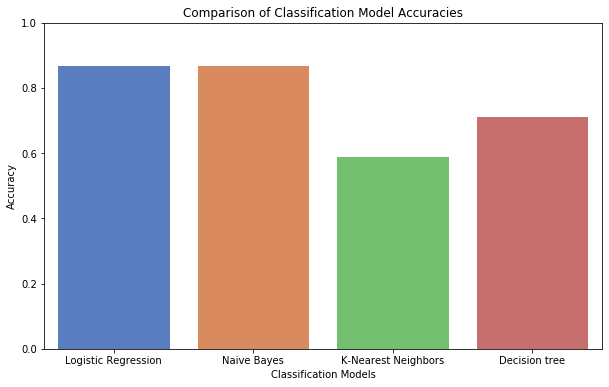

In [65]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='muted')
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy percentage

# Add labels and title
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')

# Show the bar chart
plt.show()

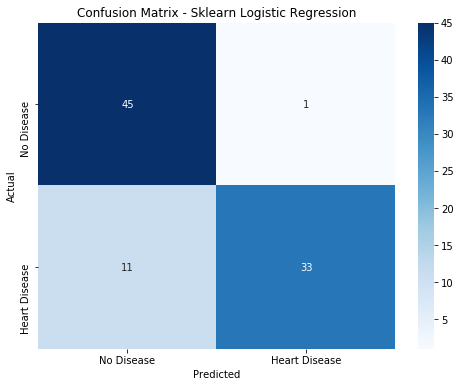

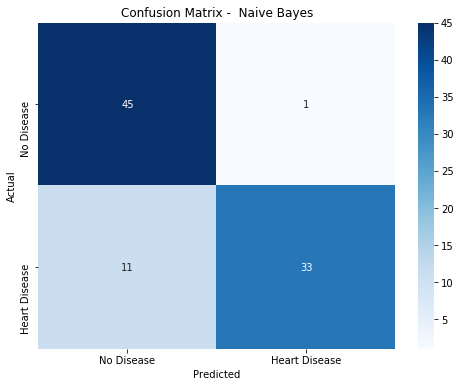

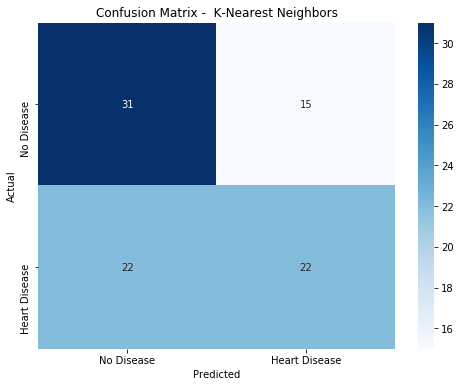

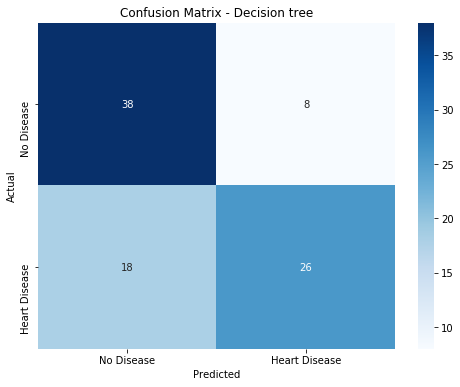

In [66]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Heart Disease'], yticklabels=['No Disease', 'Heart Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, sklearn_predictions, 'Sklearn Logistic Regression')
plot_confusion_matrix(y_test, naive_bayes_predictions, ' Naive Bayes')
plot_confusion_matrix(y_test, knn_predictions, ' K-Nearest Neighbors')
plot_confusion_matrix(y_test, dt_predictions , 'Decision tree')